# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.tail()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27027,1,2795655.0,510792,1,18,5.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2780269,ATIVO,MUNIC,Novo Horizonte do Oeste,Rondônia,-11.70974,-61.99439,230.0,843.446


In [3]:
#Contagem de missings para as variáveis de interesse
sinasc[['APGAR5','SEXO', 'GESTACAO', 'PESO']].isna().sum()

APGAR5       103
SEXO           4
GESTACAO    1232
PESO           0
dtype: int64

In [4]:
#Removendo linhas com valores ausentes para as colunas APGAR5 e SEXO
sinasc.dropna(subset = ['APGAR5', 'SEXO'], inplace = True)
#Substituindo valores NaN na coluna GESTACAO
sinasc['GESTACAO'].fillna('Ignorado', inplace = True)
#Convertendo valores de APGAR5 para tipo inteiro
sinasc['APGAR5'] = sinasc['APGAR5'].astype('int')
#Contagem de missings após tratamento dos dados ausentes
sinasc[['APGAR5','SEXO', 'GESTACAO', 'PESO']].isna().sum()

APGAR5      0
SEXO        0
GESTACAO    0
PESO        0
dtype: int64

---

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [5]:
sinasc.loc[(sinasc['APGAR5'] >= 0) & (sinasc['APGAR5'] <= 3), 'cat_APGAR5'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'cat_APGAR5'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'cat_APGAR5'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 8) & (sinasc['APGAR5'] <= 10), 'cat_APGAR5'] = 'normal'

sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,cat_APGAR5
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


---

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

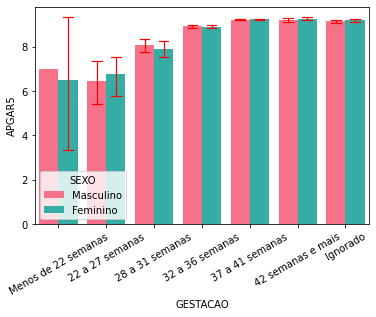

In [6]:
#Valor médio do APGAR5 por sexo para cada grupo de tempo de gestação
ordem = ['Menos de 22 semanas','22 a 27 semanas','28 a 31 semanas',
         '32 a 36 semanas','37 a 41 semanas', '42 semanas e mais', 
         'Ignorado']
g = sns.barplot(x = 'GESTACAO', 
                y = 'APGAR5',
                hue = 'SEXO',
                data = sinasc, 
                order = ordem, 
                palette = 'husl', 
                saturation = 1, 
                errcolor = 'r', 
                errwidth = 1.2, 
                capsize = 0.2);
g.tick_params(axis = 'x', rotation = 30)

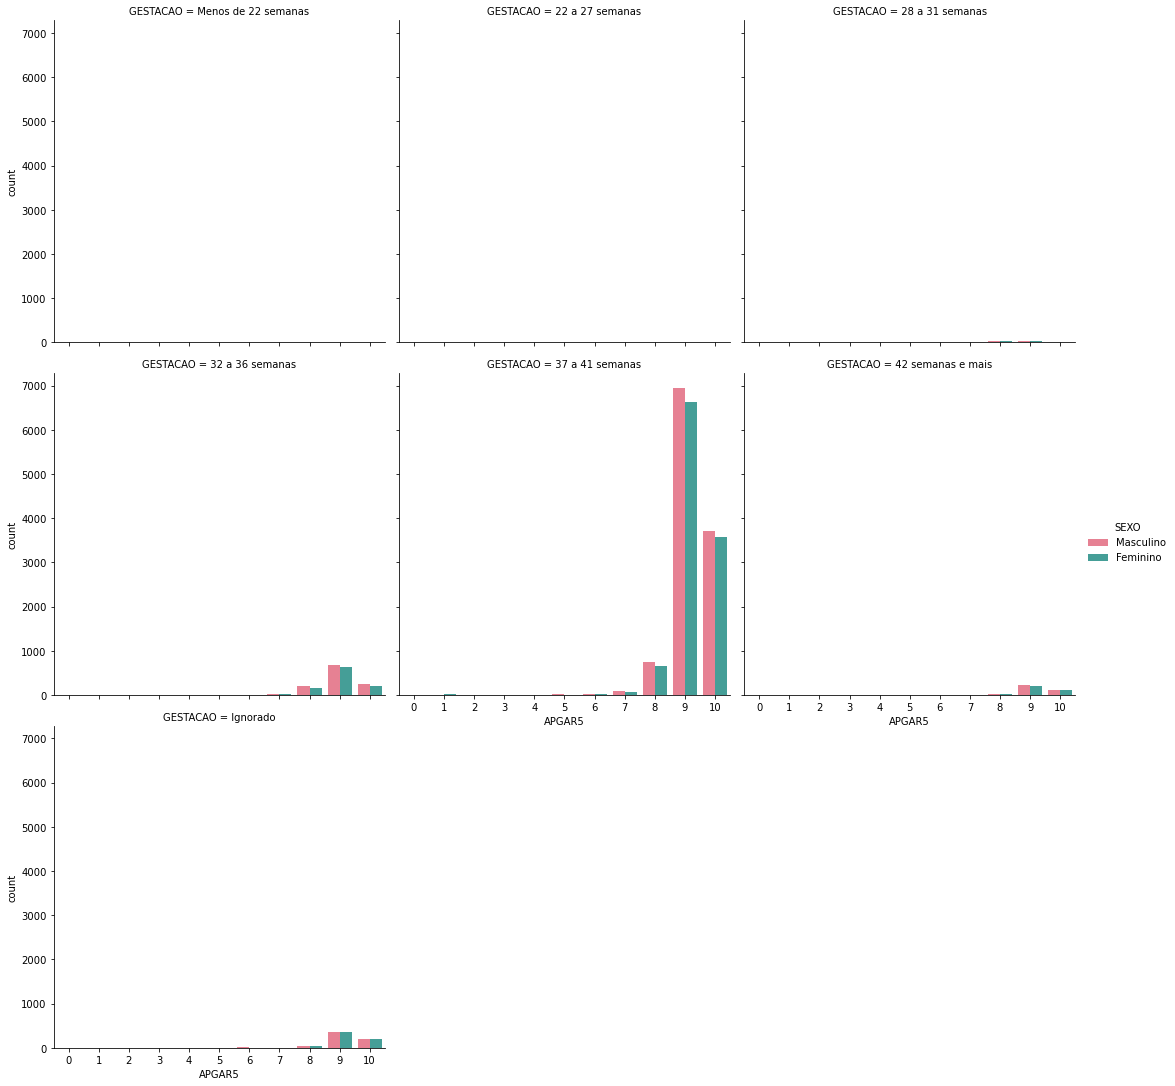

In [7]:
#Plotagem pelo método catplot
g = sns.catplot(x = 'APGAR5', 
            hue = 'SEXO',
            col = 'GESTACAO',
            col_order = ordem,
            col_wrap = 3,
            data = sinasc, 
            kind = 'count',
            palette = 'husl');

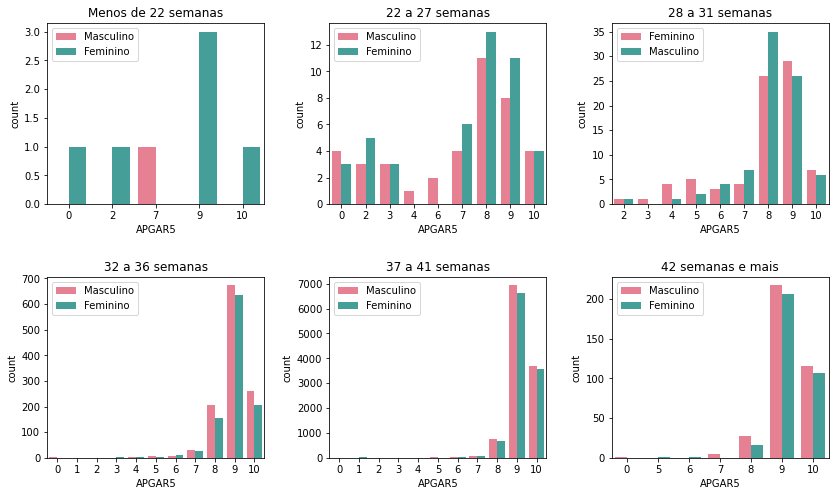

In [8]:
fig, ax = plt.subplots(2, 3, figsize = (14, 8))

#Gráfico I-Distribuição de APGAR5 por sexo para categoria 'Menos de 22 semanas'
sns.countplot(ax = ax[0,0], 
              x = 'APGAR5', 
              hue = 'SEXO', 
              data = sinasc[sinasc['GESTACAO'] == 'Menos de 22 semanas'], 
              palette = 'husl')
ax[0,0].set_title('Menos de 22 semanas')
ax[0,0].legend(loc = 'upper left')
#Gráfico II-Distribuição de APGAR5 por sexo para categoria '22 a 27 semanas'
sns.countplot(ax = ax[0,1], 
              x = 'APGAR5', 
              hue = 'SEXO', 
              data = sinasc[sinasc['GESTACAO'] == '22 a 27 semanas'], 
              palette = 'husl')
ax[0,1].set_title('22 a 27 semanas')
ax[0,1].legend(loc = 'upper left')
#Gráfico III-Distribuição de APGAR5 por sexo para categoria '28 a 31 semanas'
sns.countplot(ax = ax[0,2], 
              x = 'APGAR5', 
              hue = 'SEXO', 
              data = sinasc[sinasc['GESTACAO'] == '28 a 31 semanas'], 
              palette = 'husl')
ax[0,2].set_title('28 a 31 semanas')
ax[0,2].legend(loc = 'upper left')
#Gráfico IV-Distribuição de APGAR5 por sexo para categoria '32 a 36 semanas'
sns.countplot(ax = ax[1,0], 
              x = 'APGAR5', 
              hue = 'SEXO', 
              data = sinasc[sinasc['GESTACAO'] == '32 a 36 semanas'], 
              palette = 'husl')
ax[1,0].set_title('32 a 36 semanas')
ax[1,0].legend(loc = 'upper left')
#Gráfico V-Distribuição de APGAR5 por sexo para categoria '37 a 41 semanas'
sns.countplot(ax = ax[1,1], 
              x = 'APGAR5', 
              hue = 'SEXO', 
              data = sinasc[sinasc['GESTACAO'] == '37 a 41 semanas'], 
              palette = 'husl')
ax[1,1].set_title('37 a 41 semanas')
ax[1,1].legend(loc = 'upper left')
#Gráfico VI-Distribuição de APGAR5 por sexo para categoria '42 semanas e mais'
sns.countplot(ax = ax[1,2], 
              x = 'APGAR5', 
              hue = 'SEXO', 
              data = sinasc[sinasc['GESTACAO'] == '42 semanas e mais'], 
              palette = 'husl')
ax[1,2].set_title('42 semanas e mais')
ax[1,2].legend(loc = 'upper left')
#Ajuste dos gráficos
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

---

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [9]:
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
freq

APGAR5,0,1,2,3,4,5,6,7,8,9,10
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,1,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,44,151,1417,13564,7283
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Ignorado,1,2,2,1,2,5,7,7,86,704,399
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


---

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [10]:
#Soma dos valores de cada linha
total_grupo = freq.sum(axis = 1)
total_grupo

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2233
37 a 41 semanas        22520
42 semanas e mais        698
Ignorado                1216
Menos de 22 semanas        7
dtype: int64

In [11]:
freq_percentual = freq.div(total_grupo, axis = 0)
freq_percentual

APGAR5,0,1,2,3,4,5,6,7,8,9,10
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000896,0.000896,0.000448,0.000896,0.003583,0.004926,0.007613,0.025078,0.162114,0.585311,0.208240
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000933,0.001954,0.006705,0.062922,0.602309,0.323401
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Ignorado,0.000822,0.001645,0.001645,0.000822,0.001645,0.004112,0.005757,0.005757,0.070724,0.578947,0.328125
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [12]:
#Verificando se os percentuais de cada somam 1 (100%)
freq_percentual.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Ignorado               1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

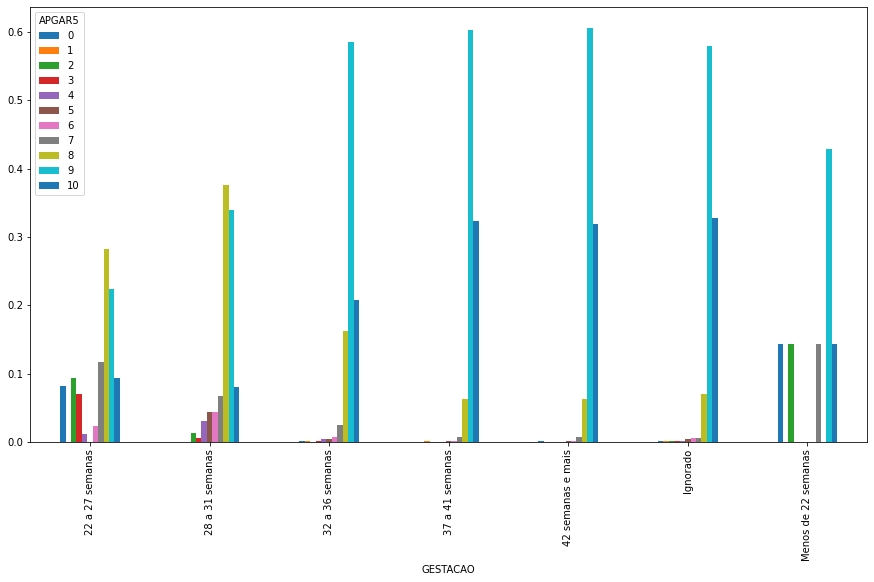

In [13]:
freq_percentual.plot(kind = 'bar', figsize = (15, 8));

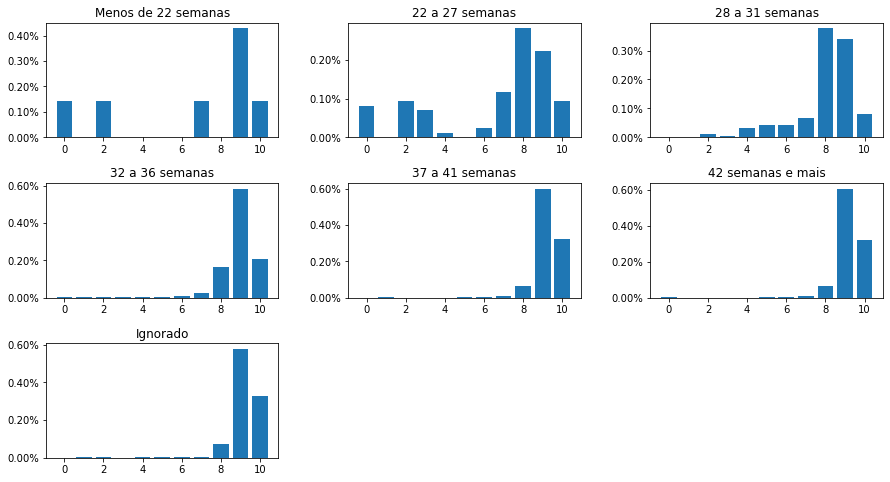

In [14]:
from matplotlib import ticker

fig = plt.figure(figsize = (15, 8))
valores_APGAR5 = freq_percentual.columns
#Gráfico I-Distribuição percentual dos valores de APGAR5 para categoria 'Menos de 22 semanas'
ax1 = fig.add_subplot(3, 3, 1)
ax1.bar(valores_APGAR5, freq_percentual.loc['Menos de 22 semanas'])
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax1.set_title('Menos de 22 semanas')
#Gráfico II-Distribuição percentual dos valores de APGAR5 para categoria '22 a 27 semanas'
ax2 = fig.add_subplot(3, 3, 2)
ax2.bar(valores_APGAR5, freq_percentual.loc['22 a 27 semanas'])
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax2.set_title('22 a 27 semanas')
#Gráfico III-Distribuição percentual dos valores de APGAR5 para categoria '28 a 31 semanas'
ax3 = fig.add_subplot(3, 3, 3)
ax3.bar(valores_APGAR5, freq_percentual.loc['28 a 31 semanas'])
ax3.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax3.set_title('28 a 31 semanas')
#Gráfico IV-Distribuição percentual dos valores de APGAR5 para categoria '32 a 36 semanas'
ax4 = fig.add_subplot(3, 3, 4)
ax4.bar(valores_APGAR5, freq_percentual.loc['32 a 36 semanas'])
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax4.set_title('32 a 36 semanas')
#Gráfico V-Distribuição percentual dos valores de APGAR5 para categoria '37 a 41 semanas'
ax5 = fig.add_subplot(3, 3, 5)
ax5.bar(valores_APGAR5, freq_percentual.loc['37 a 41 semanas'])
ax5.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax5.set_title('37 a 41 semanas')
#Gráfico VI-Distribuição percentual dos valores de APGAR5 para categoria '42 semanas e mais'
ax6 = fig.add_subplot(3, 3, 6)
ax6.bar(valores_APGAR5, freq_percentual.loc['42 semanas e mais'])
ax6.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax6.set_title('42 semanas e mais')
#Gráfico VII-Distribuição percentual dos valores de APGAR5 para categoria 'Ignorado'
ax7 = fig.add_subplot(3, 3, 7)
ax7.bar(valores_APGAR5, freq_percentual.loc['Ignorado'])
ax7.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax7.set_title('Ignorado')
#Ajuste dos gráficos
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

Percebe-se que para tempos de gestação acima de 32 semanas, há uma maior concentração de valores de APGAR5 entre 8 e 10, faixa de valores consideradas normais. No entanto, é possível obervar uma concentração significativa (acima de 50%) em torno desse valores para grupos com menos de 32 semanas. O que se observa é um maior espalhamento dos valores de APGAR5 para outras faixas de valores não considerados normais. Contudo, o fato de crianças terem nascidas antes de 37 semanas de gestação não é suficiente para afirmar que serão prematuras.

---

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

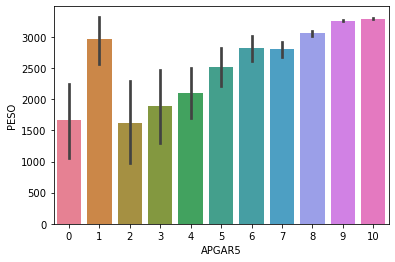

In [18]:
sns.barplot(x = 'APGAR5', 
            y = 'PESO', 
            data = sinasc, 
            palette = 'husl');

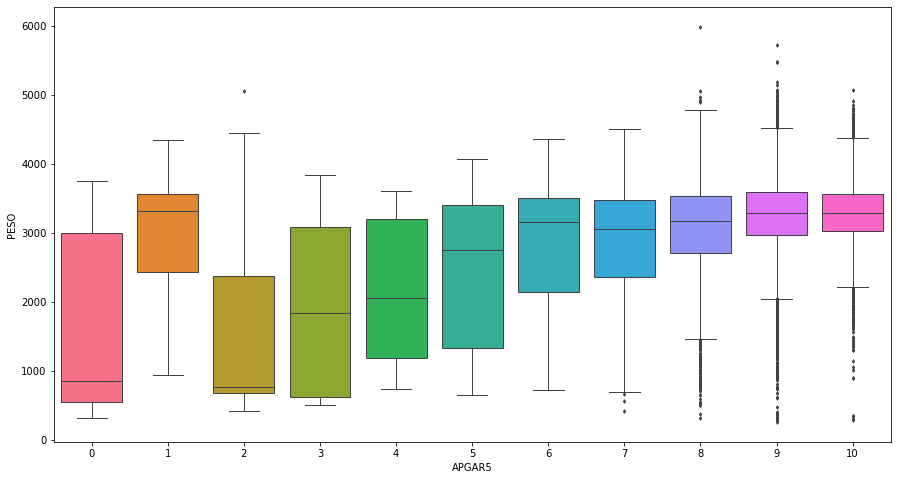

In [16]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.boxplot(ax = ax, 
            y = 'PESO', 
            x = 'APGAR5', 
            data = sinasc, 
            palette = 'husl', 
            saturation = 1, 
            linewidth = 1, 
            fliersize = 2.5);

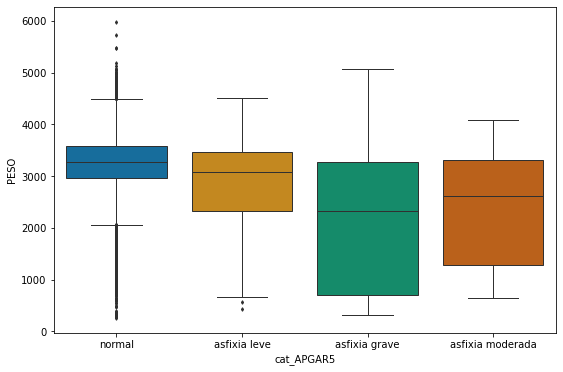

In [17]:
fig = plt.figure(figsize = (9, 6))
ax = fig.add_subplot()
sns.boxplot(ax = ax, 
            x = 'cat_APGAR5', 
            y = 'PESO', 
            data = sinasc, 
            palette = 'colorblind', 
            linewidth = 1, 
            fliersize = 2.5);

---